In [ ]:
!pip install tslearn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.preprocessing import StandardScaler
import matplotlib.dates as mdates
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.metrics import dtw
from keras.preprocessing.sequence import pad_sequences

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_csv("/content/final_data_clipped.csv")
df.head(5)

<ipython-input-35-4e14a281ddd4>:1: DtypeWarning: Columns (38,51,53,54,84,108,122,139,142,159,160,161) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/final_data_clipped.csv")


,Unnamed: 0,patient_id,pr_display,spo2_display,resp_display,pulse_rate_obscount,pulse_rate_avg,pulse_rate_min,pulse_rate_max,pulse_rate_iqr,...,QC Deviation from median.1,Weight at time of infusion,precise_datetime,CRS intervention,CRS Grade (nurse),Temperature,SpO2,BP,HR,Temperature_C
0,0,7001,71 beats/min,96%,17%,10.0,70.01,66.63,71.52,2.88,...,0.047985,74.325238,2022-10-21 08:00:00.000000000,Tocilizumab x 1 on 1/22/24,1.0,100.9,WNL,WNL,WNL,38.277778
1,1,7001,71 beats/min,96%,17%,10.0,70.01,66.63,71.52,2.88,...,0.047985,74.325238,2022-10-21 08:00:00.000000000,Tocilizumab x 1 on 1/22/24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,7001,71 beats/min,96%,17%,10.0,70.01,66.63,71.52,2.88,...,0.048813,74.325238,2022-10-21 08:14:32.727272704,Tocilizumab x 1 on 1/22/24,NaN,NaN,NaN,NaN,NaN,NaN
3,3,7001,71 beats/min,96%,17%,10.0,70.01,66.63,71.52,2.88,...,0.049641,74.325238,2022-10-21 08:29:05.454545408,Tocilizumab x 1 on 1/22/24,NaN,NaN,NaN,NaN,NaN,NaN
4,4,7001,71 beats/min,96%,17%,10.0,70.01,66.63,71.52,2.88,...,0.050469,74.325238,2022-10-21 08:43:38.181818112,Tocilizumab x 1 on 1/22/24,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
list(df.columns)

['Unnamed: 0',
 'patient_id',
 'pr_display',
 'spo2_display',
 'resp_display',
 'pulse_rate_obscount',
 'pulse_rate_avg',
 'pulse_rate_min',
 'pulse_rate_max',
 'pulse_rate_iqr',
 'spo2_obscount',
 'spo2_avg',
 'spo2_min',
 'spo2_max',
 'respiratory_rate_obscount',
 'respiratory_rate_avg',
 'respiratory_rate_min',
 'respiratory_rate_max',
 'covered_skin_temperature_obscount',
 'covered_skin_temperature_avg',
 'covered_skin_temperature_min',
 'covered_skin_temperature_max',
 'covered_axil_temperature_obscount',
 'covered_axil_temperature_avg',
 'covered_axil_temperature_min',
 'covered_axil_temperature_max',
 'motion_obscount',
 'motion_avg',
 'step_count_sum',
 'step_count_obscount',
 'time',
 'datetime',
 'PT_ID',
 'Sample ID',
 'Agent (JNJ/BMS/Caribou)',
 'Date of CAR-T infusion',
 'Age',
 'Date of Sample',
 'Days in relation to CAR-T  infusion',
 'Patient experienced CRS at any point (Yes/No)',
 'CRS on date (0 No, 1 Yes)',
 'CRS Grade ',
 'ICANs on date (0 -no, 1 yes)',
 'TOCI give

In [ ]:
complete_set = ['PT_ID','CRS on date (0 No, 1 Yes)','Agent (JNJ/BMS/Caribou)','datetime', 'spo2_avg', 'pulse_rate_avg','respiratory_rate_avg', 'covered_skin_temperature_avg','covered_axil_temperature_avg','Highest Ferritin',
 'Highest CRP','IL8',
 'TNFRSF9',
 'TIE2',
 'MCP-3',
 'CD40-L',
 'IL-1 alpha',
 'CD244',
 'EGF',
 'ANGPT1',
 'IL7',
 'PGF',
 'IL6',
 'ADGRG1',
 'MCP-1',
 'CRTAM',
 'CXCL11',
 'MCP-4',
 'TRAIL',
 'FGF2',
 'CXCL9',
 'CD8A',
 'CAIX',
 'MUC-16',
 'ADA',
 'CD4',
 'NOS3',
 'IL2',
 'Gal-9',
 'VEGFR-2',
 'CD40',
 'IL18',
 'GZMH',
 'KIR3DL1',
 'LAP TGF-beta-1',
 'CXCL1',
 'TNFSF14',
 'IL33',
 'TWEAK',
 'PDGF subunit B',
 'PDCD1',
 'FASLG',
 'CD28',
 'CCL19',
 'MCP-2',
 'CCL4',
 'IL15',
 'Gal-1',
 'PD-L1',
 'CD27',
 'CXCL5',
 'IL5',
 'HGF',
 'GZMA',
 'HO-1',
 'CX3CL1',
 'CXCL10',
 'CD70',
 'IL10',
 'TNFRSF12A',
 'CCL23',
 'CD5',
 'CCL3',
 'MMP7',
 'ARG1',
 'NCR1',
 'DCN',
 'TNFRSF21',
 'TNFRSF4',
 'MIC-A/B',
 'CCL17',
 'ANGPT2',
 'PTN',
 'CXCL12',
 'IFN-gamma',
 'LAMP3',
 'CASP-8',
 'ICOSLG',
 'MMP12',
 'CXCL13',
 'PD-L2',
 'VEGFA',
 'IL4',
 'LAG3',
 'IL12RB1',
 'IL13',
 'CCL20',
 'TNF',
 'KLRD1',
 'GZMB',
 'CD83',
 'IL12',
 'CSF-1',]

In [ ]:
# Updated code to include all features
columns_test_1 = ['PT_ID', 'CRS on date (0 No, 1 Yes)', 'Agent (JNJ/BMS/Caribou)', 'datetime'] + [col for col in complete_set if col not in ['PT_ID', 'CRS on date (0 No, 1 Yes)', 'Agent (JNJ/BMS/Caribou)', 'datetime']]

df_subset = df[columns_test_1]
df_subset.head(5)

,PT_ID,"CRS on date (0 No, 1 Yes)",Agent (JNJ/BMS/Caribou),datetime,spo2_avg,pulse_rate_avg,respiratory_rate_avg,covered_skin_temperature_avg,covered_axil_temperature_avg,Highest Ferritin,...,LAG3,IL12RB1,IL13,CCL20,TNF,KLRD1,GZMB,CD83,IL12,CSF-1
0,7001,0,BMS,2022-01-21 23:30:00,97.83,70.01,24.35,27.650,33.15,178.0,...,5.455560,2.960060,1.13701,8.961000,3.789520,4.535950,0.267810,2.691600,5.689550,9.600130
1,7001,1,BMS,2022-10-21 16:02:00,97.83,70.01,24.35,27.650,33.15,178.0,...,5.455560,2.960060,1.13701,8.961000,3.789520,4.535950,0.267810,2.691600,5.689550,9.600130
2,7001,1,BMS,2022-10-21 16:03:00,97.83,70.01,19.86,27.735,33.15,178.0,...,5.453242,2.963475,1.13701,8.969798,3.804065,4.536448,0.295854,2.694068,5.693098,9.603254
3,7001,1,BMS,2022-10-21 17:42:00,97.83,70.01,15.37,27.820,33.15,178.0,...,5.450924,2.966891,1.13701,8.978595,3.818610,4.536946,0.323899,2.696536,5.696646,9.606379
4,7001,1,BMS,2022-10-21 17:43:00,97.83,70.01,11.77,27.780,33.15,178.0,...,5.448606,2.970306,1.13701,8.987393,3.833155,4.537444,0.351943,2.699005,5.700194,9.609503


In [ ]:
df_JNJ = df_subset[(df_subset['Agent (JNJ/BMS/Caribou)']=='JNJ') | (df_subset['Agent (JNJ/BMS/Caribou)']=='JNJ OOS')]
df_BMS = df_subset[(df_subset['Agent (JNJ/BMS/Caribou)']=='BMS')]

In [ ]:
# Individualize the data
# Create a baseline dataframe
data = df_JNJ.copy()

baseline = data.groupby('PT_ID').first().reset_index()

# Subtract the baseline values for numeric columns
columns_to_individualize = [col for col in columns_test_1 if col not in ['PT_ID', 'CRS on date (0 No, 1 Yes)', 'Agent (JNJ/BMS/Caribou)','datetime']]

# for col in columns_to_individualize:
#     data[col] = pd.to_numeric(data[col], errors='coerce')
#     data[col] = data[col] - data.groupby('PT_ID')[col].transform('first')



for col in columns_to_individualize:
    data[col] = pd.to_numeric(data[col], errors='coerce')


data.head()


,PT_ID,"CRS on date (0 No, 1 Yes)",Agent (JNJ/BMS/Caribou),datetime,spo2_avg,pulse_rate_avg,respiratory_rate_avg,covered_skin_temperature_avg,covered_axil_temperature_avg,Highest Ferritin,...,LAG3,IL12RB1,IL13,CCL20,TNF,KLRD1,GZMB,CD83,IL12,CSF-1
42639,7004,0,JNJ,2022-12-05 15:44:00,71.0,82.37,11.720,32.31,35.22,979.0,...,5.200630,3.690600,2.51712,9.649000,4.937370,4.953270,7.549690,3.143600,4.983160,9.770530
42640,7004,0,JNJ,2022-12-05 15:45:00,71.0,82.37,11.720,32.31,35.22,979.0,...,5.200725,3.688587,2.51712,9.648882,4.936343,4.951395,7.540436,3.142508,4.982465,9.770604
42641,7004,0,JNJ,2022-12-05 15:46:00,71.0,82.37,18.930,32.32,35.22,979.0,...,5.200821,3.686573,2.51712,9.648764,4.935317,4.949519,7.531183,3.141416,4.981770,9.770678
42642,7004,0,JNJ,2022-12-05 15:47:00,71.0,82.37,16.325,32.39,35.22,979.0,...,5.200916,3.684560,2.51712,9.648646,4.934290,4.947644,7.521929,3.140324,4.981076,9.770751
42643,7004,0,JNJ,2022-12-05 15:48:00,71.0,82.37,13.720,32.33,35.22,979.0,...,5.201011,3.682546,2.51712,9.648528,4.933264,4.945768,7.512675,3.139233,4.980381,9.770825


In [ ]:
# Define the window size for rolling statistics (e.g., past 6 hours)
window_size = 6
lag_size = 6
time_interval = 30

# Sort data by patient ID and datetime
data = data.sort_values(by=['PT_ID', 'datetime'])

# Function to create lagged features and rolling statistics
def add_past_features(data, columns,lag_size):
    for col in columns:
        # Add lagged values
        for lag_base in range(1, lag_size + 1):
            lag = lag_base * time_interval
            data[f'{col}_lag_{lag}'] = data.groupby('PT_ID')[col].shift(lag)

        rolling_size = lag_size * time_interval
        # Add rolling statistics
        data[f'{col}_rolling_mean_{rolling_size}'] = data.groupby('PT_ID')[col].rolling(rolling_size, min_periods=1).mean().reset_index(level=0, drop=True)
        data[f'{col}_rolling_std_{rolling_size}'] = data.groupby('PT_ID')[col].rolling(rolling_size, min_periods=1).std().reset_index(level=0, drop=True)
        data[f'{col}_rolling_min_{rolling_size}'] = data.groupby('PT_ID')[col].rolling(rolling_size, min_periods=1).min().reset_index(level=0, drop=True)
        data[f'{col}_rolling_max_{rolling_size}'] = data.groupby('PT_ID')[col].rolling(rolling_size, min_periods=1).max().reset_index(level=0, drop=True)


    return data

# Add past features for selected columns
columns_to_process = [col for col in columns_test_1 if col not in ['PT_ID','CRS on date (0 No, 1 Yes)','Agent (JNJ/BMS/Caribou)','datetime']]
data = add_past_features(data, columns_to_process, lag_size)


<ipython-input-41-ab0007645706>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'{col}_lag_{lag}'] = data.groupby('PT_ID')[col].shift(lag)
<ipython-input-41-ab0007645706>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'{col}_lag_{lag}'] = data.groupby('PT_ID')[col].shift(lag)
<ipython-input-41-ab0007645706>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis

In [ ]:
list(data.columns)

['PT_ID',
 'CRS on date (0 No, 1 Yes)',
 'Agent (JNJ/BMS/Caribou)',
 'datetime',
 'spo2_avg',
 'pulse_rate_avg',
 'respiratory_rate_avg',
 'covered_skin_temperature_avg',
 'covered_axil_temperature_avg',
 'Highest Ferritin',
 'Highest CRP',
 'IL8',
 'TNFRSF9',
 'TIE2',
 'MCP-3',
 'CD40-L',
 'IL-1 alpha',
 'CD244',
 'EGF',
 'ANGPT1',
 'IL7',
 'PGF',
 'IL6',
 'ADGRG1',
 'MCP-1',
 'CRTAM',
 'CXCL11',
 'MCP-4',
 'TRAIL',
 'FGF2',
 'CXCL9',
 'CD8A',
 'CAIX',
 'MUC-16',
 'ADA',
 'CD4',
 'NOS3',
 'IL2',
 'Gal-9',
 'VEGFR-2',
 'CD40',
 'IL18',
 'GZMH',
 'KIR3DL1',
 'LAP TGF-beta-1',
 'CXCL1',
 'TNFSF14',
 'IL33',
 'TWEAK',
 'PDGF subunit B',
 'PDCD1',
 'FASLG',
 'CD28',
 'CCL19',
 'MCP-2',
 'CCL4',
 'IL15',
 'Gal-1',
 'PD-L1',
 'CD27',
 'CXCL5',
 'IL5',
 'HGF',
 'GZMA',
 'HO-1',
 'CX3CL1',
 'CXCL10',
 'CD70',
 'IL10',
 'TNFRSF12A',
 'CCL23',
 'CD5',
 'CCL3',
 'MMP7',
 'ARG1',
 'NCR1',
 'DCN',
 'TNFRSF21',
 'TNFRSF4',
 'MIC-A/B',
 'CCL17',
 'ANGPT2',
 'PTN',
 'CXCL12',
 'IFN-gamma',
 'LAMP3',
 

In [ ]:
data.shape

(173156, 1093)

In [ ]:
from datetime import timedelta
# Ensure datetime is sorted for each patient
data['datetime'] = pd.to_datetime(data['datetime'])
data = data.sort_values(by=['PT_ID', 'datetime'])

# Create a shifted DataFrame to check CRS 6 hours ahead
shifted_data = data[['PT_ID', 'datetime', 'CRS on date (0 No, 1 Yes)']].copy()
shifted_data['datetime'] = shifted_data['datetime'] + timedelta(hours=6)
shifted_data.rename(columns={'CRS on date (0 No, 1 Yes)': 'CRS_in_6_hours'}, inplace=True)

# Merge shifted data back to the original DataFrame
data = pd.merge(data, shifted_data, on=['PT_ID', 'datetime'], how='left')

# Fill NaN values with 0 (no CRS detected in 6 hours)
data['CRS_in_6_hours'] = data['CRS_in_6_hours'].fillna(0).astype(int)

In [ ]:
data.shape

(173157, 1094)

In [ ]:
data

,PT_ID,"CRS on date (0 No, 1 Yes)",Agent (JNJ/BMS/Caribou),datetime,spo2_avg,pulse_rate_avg,respiratory_rate_avg,covered_skin_temperature_avg,covered_axil_temperature_avg,Highest Ferritin,...,CSF-1_lag_60,CSF-1_lag_90,CSF-1_lag_120,CSF-1_lag_150,CSF-1_lag_180,CSF-1_rolling_mean_180,CSF-1_rolling_std_180,CSF-1_rolling_min_180,CSF-1_rolling_max_180,CRS_in_6_hours
0,7004,0,JNJ,2022-12-05 15:44:00,71.000,82.37,11.720,32.31,35.22,979.0,...,NaN,NaN,NaN,NaN,NaN,9.770530,NaN,9.770530,9.770530,0
1,7004,0,JNJ,2022-12-05 15:45:00,71.000,82.37,11.720,32.31,35.22,979.0,...,NaN,NaN,NaN,NaN,NaN,9.770567,0.000052,9.770530,9.770604,0
2,7004,0,JNJ,2022-12-05 15:46:00,71.000,82.37,18.930,32.32,35.22,979.0,...,NaN,NaN,NaN,NaN,NaN,9.770604,0.000074,9.770530,9.770678,0
3,7004,0,JNJ,2022-12-05 15:47:00,71.000,82.37,16.325,32.39,35.22,979.0,...,NaN,NaN,NaN,NaN,NaN,9.770641,0.000095,9.770530,9.770751,0
4,7004,0,JNJ,2022-12-05 15:48:00,71.000,82.37,13.720,32.33,35.22,979.0,...,NaN,NaN,NaN,NaN,NaN,9.770678,0.000117,9.770530,9.770825,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173152,7028,0,JNJ,2023-10-11 08:01:00,97.400,63.01,23.430,31.67,33.59,114.0,...,9.145477,9.143160,9.140843,9.138527,9.136210,9.143199,0.004024,9.136287,9.150110,0
173153,7028,0,JNJ,2023-10-11 08:02:00,98.000,63.52,27.270,31.72,33.59,114.0,...,9.145554,9.143237,9.140921,9.138604,9.136287,9.143275,0.004023,9.136365,9.150110,0
173154,7028,0,JNJ,2023-10-11 08:03:00,97.970,62.23,23.000,31.77,33.59,114.0,...,9.145631,9.143315,9.140998,9.138681,9.136365,9.143352,0.004021,9.136442,9.150110,0
173155,7028,0,JNJ,2023-10-11 08:04:00,97.890,60.50,21.550,31.77,33.59,114.0,...,9.145708,9.143392,9.141075,9.138758,9.136442,9.143428,0.004019,9.136519,9.150110,0


In [ ]:
data[data['CRS_in_6_hours']==1]

,PT_ID,"CRS on date (0 No, 1 Yes)",Agent (JNJ/BMS/Caribou),datetime,spo2_avg,pulse_rate_avg,respiratory_rate_avg,covered_skin_temperature_avg,covered_axil_temperature_avg,Highest Ferritin,...,CSF-1_lag_60,CSF-1_lag_90,CSF-1_lag_120,CSF-1_lag_150,CSF-1_lag_180,CSF-1_rolling_mean_180,CSF-1_rolling_std_180,CSF-1_rolling_min_180,CSF-1_rolling_max_180,CRS_in_6_hours
21544,7005,1,JNJ OOS,2022-12-15 02:30:00,99.363863,99.542636,13.680000,26.280000,34.652754,1663.0,...,9.800571,9.793527,9.786483,9.779438,9.777560,9.793945,0.011782,9.777560,9.814659,1
21545,7005,1,JNJ OOS,2022-12-15 02:31:00,99.364198,99.593455,16.740000,25.470000,34.646482,1663.0,...,9.800805,9.793761,9.786717,9.779673,9.777560,9.794153,0.011821,9.777560,9.814894,1
21546,7005,1,JNJ OOS,2022-12-15 02:32:00,99.364534,99.644273,22.520000,26.310000,34.640210,1663.0,...,9.801040,9.793996,9.786952,9.779908,9.777560,9.794361,0.011858,9.777560,9.815128,1
21547,7005,1,JNJ OOS,2022-12-15 02:33:00,99.364869,99.695091,18.520000,26.290000,34.633937,1663.0,...,9.801275,9.794231,9.787187,9.780143,9.777560,9.794571,0.011893,9.777560,9.815363,1
21548,7005,1,JNJ OOS,2022-12-15 02:34:00,99.365204,99.745909,26.220000,24.000000,34.627665,1663.0,...,9.801510,9.794466,9.787422,9.780378,9.777560,9.794783,0.011927,9.777560,9.815598,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168563,7028,0,JNJ,2023-10-06 13:56:00,92.214545,84.022188,23.670000,31.140000,33.983333,319.0,...,9.654352,9.654569,9.654785,9.655001,9.655218,9.654565,0.000376,9.653920,9.655211,1
168564,7028,0,JNJ,2023-10-06 13:57:00,92.290909,84.458125,21.246667,31.216667,33.941667,319.0,...,9.654345,9.654562,9.654778,9.654994,9.655211,9.654558,0.000376,9.653912,9.655203,1
168565,7028,0,JNJ,2023-10-06 13:58:00,92.367273,84.894063,18.823333,31.293333,33.900000,319.0,...,9.654338,9.654554,9.654771,9.654987,9.655203,9.654551,0.000376,9.653905,9.655196,1
168566,7028,0,JNJ,2023-10-06 13:59:00,92.443636,85.330000,16.400000,31.370000,33.935000,319.0,...,9.654331,9.654547,9.654763,9.654980,9.655196,9.654544,0.000376,9.653898,9.655189,1


In [ ]:
data[data['CRS_in_6_hours']==1].head(10)

,PT_ID,"CRS on date (0 No, 1 Yes)",Agent (JNJ/BMS/Caribou),datetime,spo2_avg,pulse_rate_avg,respiratory_rate_avg,covered_skin_temperature_avg,covered_axil_temperature_avg,Highest Ferritin,...,CSF-1_lag_60,CSF-1_lag_90,CSF-1_lag_120,CSF-1_lag_150,CSF-1_lag_180,CSF-1_rolling_mean_180,CSF-1_rolling_std_180,CSF-1_rolling_min_180,CSF-1_rolling_max_180,CRS_in_6_hours
21544,7005,1,JNJ OOS,2022-12-15 02:30:00,99.363863,99.542636,13.680000,26.28,34.652754,1663.0,...,9.800571,9.793527,9.786483,9.779438,9.77756,9.793945,0.011782,9.77756,9.814659,1
21545,7005,1,JNJ OOS,2022-12-15 02:31:00,99.364198,99.593455,16.740000,25.47,34.646482,1663.0,...,9.800805,9.793761,9.786717,9.779673,9.77756,9.794153,0.011821,9.77756,9.814894,1
21546,7005,1,JNJ OOS,2022-12-15 02:32:00,99.364534,99.644273,22.520000,26.31,34.640210,1663.0,...,9.801040,9.793996,9.786952,9.779908,9.77756,9.794361,0.011858,9.77756,9.815128,1
21547,7005,1,JNJ OOS,2022-12-15 02:33:00,99.364869,99.695091,18.520000,26.29,34.633937,1663.0,...,9.801275,9.794231,9.787187,9.780143,9.77756,9.794571,0.011893,9.77756,9.815363,1
21548,7005,1,JNJ OOS,2022-12-15 02:34:00,99.365204,99.745909,26.220000,24.00,34.627665,1663.0,...,9.801510,9.794466,9.787422,9.780378,9.77756,9.794783,0.011927,9.77756,9.815598,1
21549,7005,1,JNJ OOS,2022-12-15 02:35:00,99.365539,99.796727,18.785000,25.00,34.621392,1663.0,...,9.801745,9.794701,9.787657,9.780612,9.77756,9.794995,0.011960,9.77756,9.815833,1
21550,7005,1,JNJ OOS,2022-12-15 02:36:00,99.365875,99.847545,11.350000,26.29,34.615120,1663.0,...,9.801979,9.794935,9.787891,9.780847,9.77756,9.795209,0.011990,9.77756,9.816068,1
21551,7005,1,JNJ OOS,2022-12-15 02:37:00,99.366210,99.898364,22.280000,26.30,34.608847,1663.0,...,9.802214,9.795170,9.788126,9.781082,9.77756,9.795425,0.012020,9.77756,9.816302,1
21552,7005,1,JNJ OOS,2022-12-15 02:38:00,99.366545,99.949182,11.400000,24.00,34.602575,1663.0,...,9.802449,9.795405,9.788361,9.781317,9.77756,9.795641,0.012047,9.77756,9.816537,1
21553,7005,1,JNJ OOS,2022-12-15 02:39:00,99.366880,100.000000,12.616667,26.29,34.596302,1663.0,...,9.802684,9.795640,9.788596,9.781552,9.77756,9.795859,0.012073,9.77756,9.816772,1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Ensure datetime is in datetime format
data['datetime'] = pd.to_datetime(data['datetime'])

# Calculate 0.8 quantile cutoff for each patient
quantile_cutoffs = data.groupby('PT_ID')['datetime'].quantile(0.8).reset_index()
quantile_cutoffs.columns = ['PT_ID', 'cutoff_date']

# Merge the cutoff dates back into the original dataframe
data = data.merge(quantile_cutoffs, on='PT_ID')

# Create train and test datasets based on the cutoff date
train_data = data[data['datetime'] < data['cutoff_date']]
test_data = data[data['datetime'] >= data['cutoff_date']]

# Separate features and target
X_train = train_data.drop(columns=['PT_ID', 'datetime', 'CRS on date (0 No, 1 Yes)', 'Agent (JNJ/BMS/Caribou)', 'CRS_in_6_hours', 'cutoff_date'])
y_train = train_data['CRS_in_6_hours']

X_test = test_data.drop(columns=['PT_ID', 'datetime', 'CRS on date (0 No, 1 Yes)', 'Agent (JNJ/BMS/Caribou)', 'CRS_in_6_hours', 'cutoff_date'])
y_test = test_data['CRS_in_6_hours']



In [ ]:
# X = data.drop(columns=['PT_ID', 'datetime', 'CRS on date (0 No, 1 Yes)', 'Agent (JNJ/BMS/Caribou)', 'CRS_in_6_hours'])
# y = data['CRS_in_6_hours']

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, classification_report

# Convert data to DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Calculate class weights
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array([0, 1]),
    y=y_train  # Target variable in the training set
)

# Set the scale_pos_weight parameter in XGBoost
scale_pos_weight = class_weights[1] / class_weights[0]

# XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'scale_pos_weight': scale_pos_weight  # Add the class imbalance weight
}

# Train the XGBoost model
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
model = xgb.train(params, dtrain, num_boost_round=100)


# Make predictions
y_pred = (model.predict(dtest) > 0.01).astype(int)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


# Predict probabilities for AUC-ROC
y_prob = model.predict(dtest)
auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC Score:", auc)



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:23:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9233811599642022
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     30632
           1       0.67      0.67      0.67      4007

    accuracy                           0.92     34639
   macro avg       0.81      0.81      0.81     34639
weighted avg       0.92      0.92      0.92     34639

AUC-ROC Score: 0.9361985428933682


In [ ]:
from sklearn.metrics import f1_score

def find_best_threshold_class1(y_true, y_prob, step=0.05):
    """
    Find the best threshold for maximizing F1-score for class 1 (minority class).

    Parameters:
        y_true (array-like): True labels (binary: 0 or 1).
        y_prob (array-like): Predicted probabilities for the positive class.
        step (float): Step size for threshold search. Default is 0.05.

    Returns:
        best_threshold (float): Threshold that gives the highest F1-score for class 1.
        best_f1 (float): The highest F1-score for class 1 achieved.
    """
    best_threshold = 0.0
    best_f1 = 0.0  # Start with the lowest possible F1-score

    # Iterate through thresholds from 0 to 1
    for threshold in np.arange(0, 1 + step, step):
        y_pred = (y_prob >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred, pos_label=1)  # F1 for class 1

        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    return best_threshold, best_f1
best_threshold, best_f1 = find_best_threshold_class1(y_test, y_prob, step=0.01)
best_threshold

0.16

<Figure size 1000x800 with 0 Axes>

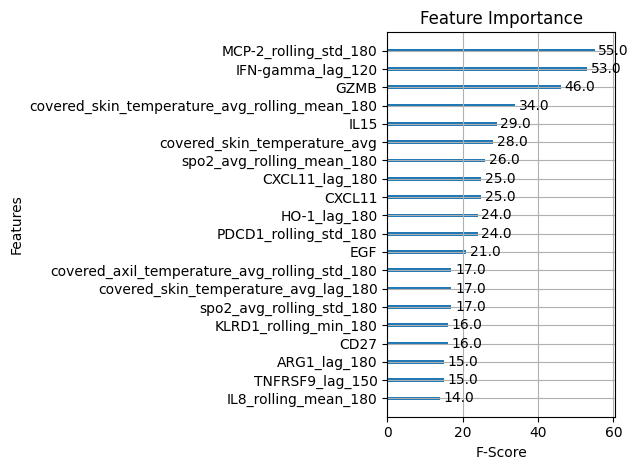

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Plot feature importance
plt.figure(figsize=(10, 8))
xgb.plot_importance(model, max_num_features=20)  # Show top 20 features
plt.title('Feature Importance')
plt.xlabel('F-Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
import xgboost as xgb

# Step 2: Apply Random Oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("Class distribution after oversampling:")
print(pd.Series(y_train_resampled).value_counts())

# Step 3: Convert to XGBoost DMatrix
dtrain = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
dtest = xgb.DMatrix(X_test, label=y_test)

# Step 4: Define XGBoost Parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100
}

# Step 5: Train the XGBoost Model
model = xgb.train(params, dtrain, num_boost_round=100)

# Step 6: Predict and Evaluate
y_prob = model.predict(dtest)  # Predicted probabilities
y_pred = (y_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_prob))
print("Classification Report:\n", classification_report(y_test, y_pred))


Class distribution after oversampling:
CRS_in_6_hours
0    124527
1    124527
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:23:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.940875891336355
AUC-ROC Score: 0.930536132315588
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     30632
           1       0.83      0.61      0.71      4007

    accuracy                           0.94     34639
   macro avg       0.89      0.80      0.84     34639
weighted avg       0.94      0.94      0.94     34639



In [ ]:
X_train_resampled.dtypes

,0
spo2_avg,float64
pulse_rate_avg,float64
respiratory_rate_avg,float64
covered_skin_temperature_avg,float64
covered_axil_temperature_avg,float64
...,...
CSF-1_lag_180,float64
CSF-1_rolling_mean_180,float64
CSF-1_rolling_std_180,float64
CSF-1_rolling_min_180,float64


<Figure size 1000x800 with 0 Axes>

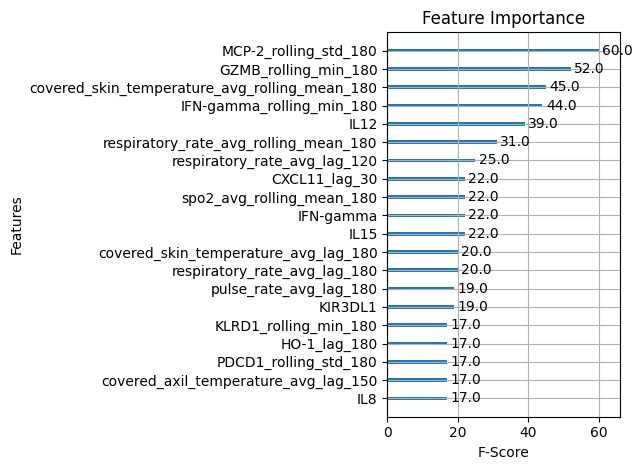

Top 20 features and their importance scores:
MCP-2_rolling_std_180: 60.0
GZMB_rolling_min_180: 52.0
covered_skin_temperature_avg_rolling_mean_180: 45.0
IFN-gamma_rolling_min_180: 44.0
IL12: 39.0
respiratory_rate_avg_rolling_mean_180: 31.0
respiratory_rate_avg_lag_120: 25.0
IL15: 22.0
IFN-gamma: 22.0
spo2_avg_rolling_mean_180: 22.0
CXCL11_lag_30: 22.0
respiratory_rate_avg_lag_180: 20.0
covered_skin_temperature_avg_lag_180: 20.0
KIR3DL1: 19.0
pulse_rate_avg_lag_180: 19.0
covered_axil_temperature_avg: 17.0
IL8: 17.0
covered_axil_temperature_avg_lag_150: 17.0
PDCD1_rolling_std_180: 17.0
HO-1_lag_180: 17.0
KLRD1_rolling_min_180: 17.0
spo2_avg: 16.0
covered_skin_temperature_avg: 16.0
EGF: 16.0
covered_axil_temperature_avg_lag_180: 16.0
IL15_lag_180: 16.0
spo2_avg_rolling_std_180: 15.0
pulse_rate_avg_rolling_std_180: 15.0
respiratory_rate_avg_lag_30: 15.0
CRTAM_lag_90: 15.0
CD8A_rolling_max_180: 15.0
IL18_rolling_max_180: 15.0
CCL20_rolling_std_180: 15.0
pulse_rate_avg_lag_150: 14.0
covered_a

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Plot feature importance
plt.figure(figsize=(10, 8))
xgb.plot_importance(model, max_num_features=20)  # Show top 20 features
plt.title('Feature Importance')
plt.xlabel('F-Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

importance = model.get_score(importance_type='weight')  # Directly call get_score() on the Booster object
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
top_20_features = sorted_importance[:40]

print("Top 20 features and their importance scores:")
for feature, score in top_20_features:
    print(f"{feature}: {score}")
feature_names = [feature for feature, _ in top_20_features]

# Get unique feature names
unique_features_1 = list(set(feature_names))


In [ ]:
# After training the model
# Extract feature importances
importances = model.get_score(importance_type='gain')
importance_df = pd.DataFrame({
    'Feature': list(importances.keys()),
    'Importance': list(importances.values())
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display top 20 features
print("Top 20 Features based on XGBoost Importance:")
print(importance_df.head(20))

# Optionally, save the importance dataframe to a CSV file
importance_df.to_csv('feature_importances.csv', index=False)


feature_names_1 = importance_df.head(40)['Feature']

# Get unique feature names
unique_features_2 = list(set(feature_names_1))


Top 20 Features based on XGBoost Importance:
                   Feature    Importance
342  MCP-2_rolling_std_180  15329.600586
351            IL15_lag_90  13437.167969
244   CD8A_rolling_max_180   7455.057617
236            CD8A_lag_30   5899.022949
182    IL7_rolling_std_180   4580.739258
465          MMP12_lag_120   3446.041748
350            IL15_lag_60   3130.954102
381           HO-1_lag_180   3104.672852
379           HO-1_lag_120   3081.994873
514  KLRD1_rolling_min_180   2639.546387
59                     PTN   2520.784180
349            IL15_lag_30   2415.103271
44                    IL15   2204.060059
371    IL5_rolling_max_180   2113.345215
487           LAG3_lag_150   1951.304688
234  CXCL9_rolling_std_180   1865.939819
518   GZMB_rolling_min_180   1653.897705
243   CD8A_rolling_min_180   1625.913330
445    PTN_rolling_std_180   1433.028076
48                   CXCL5   1310.728638


<Figure size 1000x800 with 0 Axes>

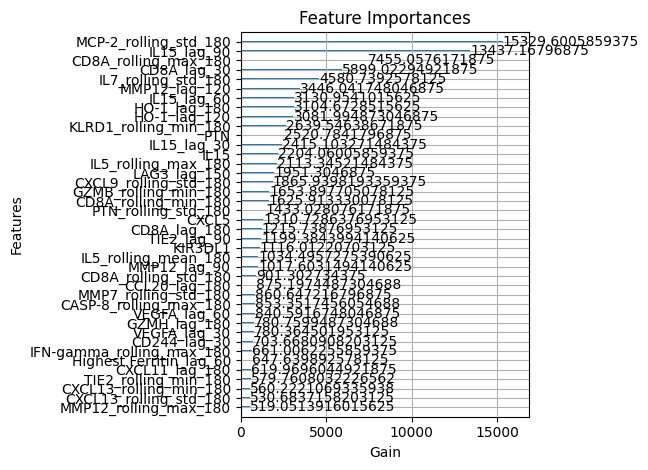

In [ ]:
# Plot feature importance
plt.figure(figsize=(10, 8))
xgb.plot_importance(model, importance_type='gain', max_num_features=40)
plt.title('Feature Importances')
plt.xlabel('Gain')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [ ]:
# Select top N features based on importance
top_features = importance_df['Feature'].head(20).tolist()
gg = list(set(unique_features_1 + unique_features_2))
print(gg)
print(len(gg))
print(len(unique_features_1))
print(len(unique_features_2))
# Filter training and testing data
X_train_selected = X_train[gg]
X_test_selected = X_test[gg]

# Retrain the model
dtrain_selected = xgb.DMatrix(X_train_selected, label=y_train)
dtest_selected = xgb.DMatrix(X_test_selected, label=y_test)
model_selected = xgb.train(params, dtrain_selected, num_boost_round=100)

# Evaluate the model
y_pred_selected = (model_selected.predict(dtest_selected) > 0.13).astype(int)
print("Classification Report with Selected Features:\n", classification_report(y_test, y_pred_selected))


# After getting predicted probabilities
y_prob_selected = model_selected.predict(dtest_selected)

# Find the best threshold
best_threshold, best_f1 = find_best_threshold_class1(y_test, y_prob_selected, step=0.01)
print(f"Best Threshold: {best_threshold}, Best F1-Score: {best_f1}")

# Use the best threshold
y_pred_selected = (y_prob_selected > best_threshold).astype(int)



['GZMB_rolling_min_180', 'MMP12_lag_90', 'CCL20_lag_180', 'PTN_rolling_std_180', 'CXCL10_lag_150', 'pulse_rate_avg_rolling_std_180', 'covered_skin_temperature_avg', 'IFN-gamma_rolling_min_180', 'IL15', 'CXCL13_rolling_std_180', 'spo2_avg_rolling_std_180', 'IFN-gamma', 'IFN-gamma_rolling_max_180', 'IL15_lag_60', 'EGF', 'KLRD1_rolling_min_180', 'VEGFA_lag_30', 'IL18_rolling_max_180', 'HO-1_lag_180', 'CXCL13_rolling_min_180', 'CASP-8_rolling_max_180', 'CD8A_lag_30', 'IL8', 'CD8A_rolling_min_180', 'PDCD1_rolling_std_180', 'respiratory_rate_avg_lag_30', 'CRTAM', 'MMP12_rolling_max_180', 'CXCL9_rolling_std_180', 'CCL20_rolling_std_180', 'VEGFA_lag_60', 'covered_axil_temperature_avg_lag_180', 'IL7_rolling_std_180', 'IL15_lag_90', 'pulse_rate_avg_lag_180', 'IL5_rolling_max_180', 'CD8A_rolling_max_180', 'GZMH_lag_180', 'IL12', 'TIE2_lag_90', 'spo2_avg_rolling_mean_180', 'IL15_lag_180', 'pulse_rate_avg_lag_150', 'KIR3DL1', 'CRTAM_lag_90', 'MMP7_rolling_std_180', 'CXCL11_lag_30', 'CD8A_lag_180', 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:24:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report with Selected Features:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     30632
           1       0.79      0.52      0.63      4007

    accuracy                           0.93     34639
   macro avg       0.86      0.75      0.80     34639
weighted avg       0.92      0.93      0.92     34639

Best Threshold: 0.03, Best F1-Score: 0.7212330587297369


In [ ]:
# from sklearn.feature_selection import RFECV
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import make_scorer, f1_score

# # Initialize the model
# model = xgb.XGBClassifier(**params)

# # Define cross-validation strategy
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# f1_scorer = make_scorer(f1_score, pos_label=1)

# # Initialize RFECV
# rfecv = RFECV(
#     estimator=model,
#     step=1,
#     cv=cv,
#     scoring=f1_scorer,
#     n_jobs=-1
# )

# # Fit RFECV
# rfecv.fit(X_train_resampled, y_train_resampled)

# # Get selected features
# selected_features = X_train_resampled.columns[rfecv.support_]

# print(f"Number of selected features: {len(selected_features)}")
# print("Selected features:")
# print(selected_features)

# # Retrain the model with selected features
# X_train_selected = X_train_resampled[selected_features]
# X_test_selected = X_test[selected_features]
# dtrain_selected = xgb.DMatrix(X_train_selected, label=y_train_resampled)
# dtest_selected = xgb.DMatrix(X_test_selected, label=y_test)
# model_selected = xgb.train(params, dtrain_selected, num_boost_round=100)


### Model Finetuning

In [ ]:
from sklearn.metrics import f1_score

def evaluate_model_with_weights(X_train, X_test, y_train, y_test, selected_features, scale_pos_weight):
    # Create XGBoost DMatrix for the selected features
    dtrain = xgb.DMatrix(X_train[selected_features], label=y_train)
    dtest = xgb.DMatrix(X_test[selected_features], label=y_test)

    # Define XGBoost parameters (include scale_pos_weight)
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'max_depth': 6,
        'learning_rate': 0.1,
        'scale_pos_weight': scale_pos_weight,
    }

    # Train the model
    model = xgb.train(params, dtrain, num_boost_round=100)

    # Predict probabilities and calculate F1-score for the minority class
    y_prob = model.predict(dtest)
    y_pred = (y_prob > 0.5).astype(int)
    f1 = f1_score(y_test, y_pred, pos_label=1)  # F1-score for minority class
    return f1


In [ ]:
# Inspect the types of the variables
print("Type of unique_features_1:", type(unique_features_1))
print("Type of unique_features_2:", type(unique_features_2))

# Inspect the first few elements of each list
print("\nFirst 5 elements of unique_features_1:")
print(unique_features_1[:5])

print("\nFirst 5 elements of unique_features_2:")
print(unique_features_2[:5])

# Check the entire lists (optional, if not too large)
print("\nContents of unique_features_1:")
print(unique_features_1)

print("\nContents of unique_features_2:")
print(unique_features_2)



main_features = list(set(unique_features_1 + unique_features_2))


Type of unique_features_1: <class 'list'>
Type of unique_features_2: <class 'list'>

First 5 elements of unique_features_1:
['GZMB_rolling_min_180', 'CXCL10_lag_150', 'pulse_rate_avg_rolling_std_180', 'covered_skin_temperature_avg', 'IFN-gamma_rolling_min_180']

First 5 elements of unique_features_2:
['GZMB_rolling_min_180', 'MMP12_lag_90', 'CCL20_lag_180', 'PTN_rolling_std_180', 'IL15']

Contents of unique_features_1:
['GZMB_rolling_min_180', 'CXCL10_lag_150', 'pulse_rate_avg_rolling_std_180', 'covered_skin_temperature_avg', 'IFN-gamma_rolling_min_180', 'IL15', 'spo2_avg_rolling_std_180', 'IFN-gamma', 'EGF', 'KLRD1_rolling_min_180', 'IL18_rolling_max_180', 'HO-1_lag_180', 'IL8', 'PDCD1_rolling_std_180', 'respiratory_rate_avg_lag_30', 'CRTAM', 'CCL20_rolling_std_180', 'covered_axil_temperature_avg_lag_180', 'pulse_rate_avg_lag_180', 'CD8A_rolling_max_180', 'IL12', 'spo2_avg_rolling_mean_180', 'IL15_lag_180', 'pulse_rate_avg_lag_150', 'KIR3DL1', 'CRTAM_lag_90', 'CXCL11_lag_30', 'covered

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, f1_score
import xgboost as xgb

# Initialize the XGBoost classifier with your parameters
xgb_clf = xgb.XGBClassifier(**params)

# Fit the model on the training data using main_features
xgb_clf.fit(X_train[main_features], y_train)

# Use SelectFromModel to select features with importance above a certain threshold
# Here, we use 'median' to select features with importance greater than the median importance
sfm = SelectFromModel(xgb_clf, threshold='median', prefit=True)

# Get selected features
selected_features = X_train[main_features].columns[sfm.get_support()].tolist()

print(f"Number of selected features: {len(selected_features)}")
print("Selected features:")
print(selected_features)

# Retrain the model with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Convert to DMatrix
dtrain_selected = xgb.DMatrix(X_train_selected, label=y_train)
dtest_selected = xgb.DMatrix(X_test_selected, label=y_test)

# Train the model
model_selected = xgb.train(params, dtrain_selected, num_boost_round=100)

# Evaluate the model
y_prob_selected = model_selected.predict(dtest_selected)
y_pred_selected = (y_prob_selected > best_threshold).astype(int)

print("\nClassification Report with Selected Features:")
print(classification_report(y_test, y_pred_selected))

# Compare performance with all main_features
X_train_main = X_train[main_features]
X_test_main = X_test[main_features]
dtrain_main = xgb.DMatrix(X_train_main, label=y_train)
dtest_main = xgb.DMatrix(X_test_main, label=y_test)
model_main = xgb.train(params, dtrain_main, num_boost_round=100)

y_prob_main = model_main.predict(dtest_main)
y_pred_main = (y_prob_main > best_threshold).astype(int)

print("\nClassification Report with All Main Features:")
print(classification_report(y_test, y_pred_main))


Number of selected features: 36
Selected features:
['GZMB_rolling_min_180', 'MMP12_lag_90', 'CCL20_lag_180', 'PTN_rolling_std_180', 'CXCL10_lag_150', 'IFN-gamma_rolling_min_180', 'IL15', 'CXCL13_rolling_std_180', 'EGF', 'KLRD1_rolling_min_180', 'IL18_rolling_max_180', 'HO-1_lag_180', 'CXCL13_rolling_min_180', 'IL8', 'CD8A_rolling_min_180', 'PDCD1_rolling_std_180', 'CRTAM', 'MMP12_rolling_max_180', 'CXCL9_rolling_std_180', 'VEGFA_lag_60', 'IL7_rolling_std_180', 'IL15_lag_90', 'IL5_rolling_max_180', 'CD8A_rolling_max_180', 'IL12', 'spo2_avg_rolling_mean_180', 'IL15_lag_180', 'KIR3DL1', 'CRTAM_lag_90', 'CD8A_lag_180', 'CD8A_rolling_std_180', 'PTN', 'IL5_rolling_mean_180', 'MCP-2_rolling_std_180', 'Highest Ferritin_lag_60', 'TIE2_rolling_min_180']


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:04:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)



Classification Report with Selected Features:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     30632
           1       0.75      0.56      0.64      4007

    accuracy                           0.93     34639
   macro avg       0.85      0.77      0.80     34639
weighted avg       0.92      0.93      0.92     34639



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:04:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)



Classification Report with All Main Features:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     30632
           1       0.77      0.68      0.72      4007

    accuracy                           0.94     34639
   macro avg       0.86      0.83      0.84     34639
weighted avg       0.94      0.94      0.94     34639



In [ ]:
# Compute the correlation matrix
corr_matrix = X_train[main_features].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than a threshold (e.g., 0.9)
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop correlated features
selected_features = [feature for feature in main_features if feature not in to_drop]

print(f"Number of selected features after correlation analysis: {len(selected_features)}")
print("Selected features:")
print(selected_features)

# Retrain the model with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Convert to DMatrix
dtrain_selected = xgb.DMatrix(X_train_selected, label=y_train)
dtest_selected = xgb.DMatrix(X_test_selected, label=y_test)

# Retrain the model
model_selected = xgb.train(params, dtrain_selected, num_boost_round=100)

# Predict and evaluate
y_prob_selected = model_selected.predict(dtest_selected)
y_pred_selected = (y_prob_selected > best_threshold).astype(int)

print("\nClassification Report with Selected Features (Correlation Analysis):")
print(classification_report(y_test, y_pred_selected))


Number of selected features after correlation analysis: 53
Selected features:
['GZMB_rolling_min_180', 'MMP12_lag_90', 'CCL20_lag_180', 'PTN_rolling_std_180', 'CXCL10_lag_150', 'pulse_rate_avg_rolling_std_180', 'covered_skin_temperature_avg', 'IFN-gamma_rolling_min_180', 'IL15', 'CXCL13_rolling_std_180', 'spo2_avg_rolling_std_180', 'EGF', 'KLRD1_rolling_min_180', 'VEGFA_lag_30', 'IL18_rolling_max_180', 'HO-1_lag_180', 'CXCL13_rolling_min_180', 'CASP-8_rolling_max_180', 'CD8A_lag_30', 'IL8', 'PDCD1_rolling_std_180', 'respiratory_rate_avg_lag_30', 'CRTAM', 'CXCL9_rolling_std_180', 'CCL20_rolling_std_180', 'covered_axil_temperature_avg_lag_180', 'IL7_rolling_std_180', 'pulse_rate_avg_lag_180', 'IL5_rolling_max_180', 'GZMH_lag_180', 'IL12', 'TIE2_lag_90', 'spo2_avg_rolling_mean_180', 'pulse_rate_avg_lag_150', 'KIR3DL1', 'MMP7_rolling_std_180', 'CXCL11_lag_30', 'covered_axil_temperature_avg_rolling_max_180', 'respiratory_rate_avg_lag_120', 'CXCL5', 'LAG3_lag_150', 'spo2_avg', 'CD8A_rolling_

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:04:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)



Classification Report with Selected Features (Correlation Analysis):
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     30632
           1       0.75      0.65      0.70      4007

    accuracy                           0.93     34639
   macro avg       0.85      0.81      0.83     34639
weighted avg       0.93      0.93      0.93     34639



In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# main_features = X_train.columns.tolist()
# # **Define the number of top features to select**
# N = 50  # You can adjust this number as needed

# # Train a Random Forest model
# rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_clf.fit(X_train[main_features], y_train)

# # Get feature importances from Random Forest
# rf_importances = rf_clf.feature_importances_
# rf_feature_importance = pd.DataFrame({
#     'Feature': main_features,
#     'Importance_rf': rf_importances
# }).sort_values('Importance_rf', ascending=False)

# # Get feature importances from XGBoost
# xgb_importances = model.get_score(importance_type='gain')
# xgb_feature_importance = pd.DataFrame({
#     'Feature': list(xgb_importances.keys()),
#     'Importance_xgb': list(xgb_importances.values())
# })

# # **Ensure feature names are consistent**
# # If feature names differ between models, align them appropriately

# # Merge feature importances from both models
# combined_importance = pd.merge(
#     xgb_feature_importance,
#     rf_feature_importance,
#     on='Feature',
#     how='inner'  # Use 'inner' to include features present in both models
# )

# # Fill any NaN values with zero (in case of missing importances)
# combined_importance.fillna(0, inplace=True)

# # Compute combined importance
# combined_importance['Combined_Importance'] = (
#     combined_importance['Importance_xgb'] + combined_importance['Importance_rf']
# )

# # Sort by combined importance
# combined_importance = combined_importance.sort_values('Combined_Importance', ascending=False)

# # Select top N features
# top_N_features = combined_importance['Feature'].head(N).tolist()

# print(f"Top {N} features based on combined importance:")
# print(top_N_features)

# # Retrain the model with top N features
# X_train_selected = X_train[top_N_features]
# X_test_selected = X_test[top_N_features]

# # Convert to DMatrix
# dtrain_selected = xgb.DMatrix(X_train_selected, label=y_train)
# dtest_selected = xgb.DMatrix(X_test_selected, label=y_test)

# # Retrain the model
# model_selected = xgb.train(params, dtrain_selected, num_boost_round=100)

# # Predict and evaluate
# y_prob_selected = model_selected.predict(dtest_selected)
# y_pred_selected = (y_prob_selected > best_threshold).astype(int)

# print("\nClassification Report with Selected Features (Combined Importance):")
# print(classification_report(y_test, y_pred_selected))


In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

xgb_clf = xgb.XGBClassifier(**params)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rfecv = RFECV(
    estimator=xgb_clf,
    step=1,
    cv=cv,
    scoring='f1',
    n_jobs=-1
)

rfecv.fit(X_train[main_features], y_train)

selected_features = [main_features[i] for i in range(len(main_features)) if rfecv.support_[i]]

print(f"Number of selected features: {len(selected_features)}")
print("Selected features:")
print(selected_features)

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

xgb_clf_selected = xgb.XGBClassifier(**params)
xgb_clf_selected.fit(X_train_selected, y_train)

y_prob_selected = xgb_clf_selected.predict_proba(X_test_selected)[:, 1]
y_pred_selected = (y_prob_selected > best_threshold).astype(int)

print("\nClassification Report with Selected Features (RFECV):")
print(classification_report(y_test, y_pred_selected))


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Number of selected features: 72
Selected features:
['GZMB_rolling_min_180', 'MMP12_lag_90', 'CCL20_lag_180', 'PTN_rolling_std_180', 'CXCL10_lag_150', 'pulse_rate_avg_rolling_std_180', 'covered_skin_temperature_avg', 'IFN-gamma_rolling_min_180', 'IL15', 'CXCL13_rolling_std_180', 'spo2_avg_rolling_std_180', 'IFN-gamma', 'IFN-gamma_rolling_max_180', 'IL15_lag_60', 'EGF', 'KLRD1_rolling_min_180', 'VEGFA_lag_30', 'IL18_rolling_max_180', 'HO-1_lag_180', 'CXCL13_rolling_min_180', 'CASP-8_rolling_max_180', 'CD8A_lag_30', 'IL8', 'CD8A_rolling_min_180', 'PDCD1_rolling_std_180', 'respiratory_rate_avg_lag_30', 'CRTAM', 'MMP12_rolling_max_180', 'CXCL9_rolling_std_180', 'CCL20_rolling_std_180', 'VEGFA_lag_60', 'covered_axil_temperature_avg_lag_180', 'IL7_rolling_std_180', 'IL15_lag_90', 'pulse_rate_avg_lag_180', 'IL5_rolling_max_180', 'CD8A_rolling_max_180', 'GZMH_lag_180', 'IL12', 'TIE2_lag_90', 'spo2_avg_rolling_mean_180', 'IL15_lag_180', 'pulse_rate_avg_lag_150', 'KIR3DL1', 'CRTAM_lag_90', 'MMP7_

In [ ]:
y_prob_selected = xgb_clf_selected.predict_proba(X_test_selected)[:, 1]
y_pred_selected = (y_prob_selected > 0.03).astype(int)

print("\nClassification Report with Selected Features (RFECV):")
print(classification_report(y_test, y_pred_selected))


Classification Report with Selected Features (RFECV):
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     30632
           1       0.77      0.68      0.72      4007

    accuracy                           0.94     34639
   macro avg       0.86      0.83      0.84     34639
weighted avg       0.94      0.94      0.94     34639



In [ ]:
# from itertools import combinations
# import numpy as np

# # Define all available features
# # all_features = X_train.columns.tolist()
# gg = list(set(unique_features_1 + unique_features_2))
# print(gg)
# print(len(gg))
# print(len(unique_features_1))
# print(len(unique_features_2))

# # Initialize variables to store the best combination and its score
# best_features = None
# best_f1 = -np.inf

# # Iterate over feature subsets
# for r in range(1, len(gg) + 1):  # From 1 feature to all features
#     for subset in combinations(gg, r):
#         # Evaluate the model with the current subset of features
#         f1 = evaluate_model_with_weights(
#             X_train=X_train,
#             X_test=X_test,
#             y_train=y_train,
#             y_test=y_test,
#             selected_features=list(subset),
#             scale_pos_weight=scale_pos_weight
#         )

#         # Update the best combination if the current subset performs better
#         if f1 > best_f1:
#             best_f1 = f1
#             best_features = subset

# # Display the best feature subset and its F1-score
# print(f"Best Features: {best_features}")
# print(f"Best F1-Score: {best_f1}")


In [ ]:
best_features

('GZMB_rolling_min_180', 'KLRD1_rolling_min_180', 'IL8', 'GZMH_lag_180')

In [ ]:
best_f1

0.7711370262390671